# Applying Neural Networks to Regression Problem

Predict Fuel Efficiency using Neural Networks

**Processing steps**

- Check the version of Tensorflow and Keras
- Load training and test data including labels
- Normalize the images
- Plot few images after being normalized
- Create a Neural Network and build a model
- Train the model on the training dataset
- Evaluate the accuracy of the model using test dataset
- Plot the accuracy and loss for the model

In a <i>regression</i> problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a <i>classification</i> problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [1]:
# importing packages
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid') 

In [2]:
# checking tensorflow version
tf.__version__, tf.keras.__version__

('2.1.0', '2.2.4-tf')

## Locating the Dataset

In [3]:
# locating dataset path for keras data
dataset_path = keras.utils.get_file("auto-mpg.data", 
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

## Importing Dataset

In [4]:
# importing data
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

In [5]:
# checking first rows
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
# checking last few rows
df.tail(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
# checking shape of the data
df.shape

(398, 8)

In [8]:
# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


## Cleaning Data

In [9]:
# checking null values
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
# removing null values
df = df.dropna()
df.shape

(392, 8)

## Handling Categorical Features

In [11]:
# converting categorical column (Origin) to numeric
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [12]:
# converting cols to dummy values/variables
df = pd.get_dummies(df, prefix='', prefix_sep='')

In [13]:
# checking changes
df.head(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1


In [14]:
# checking new shape
df.shape

(392, 10)

In [15]:
# getting more details of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


## Exploring Data

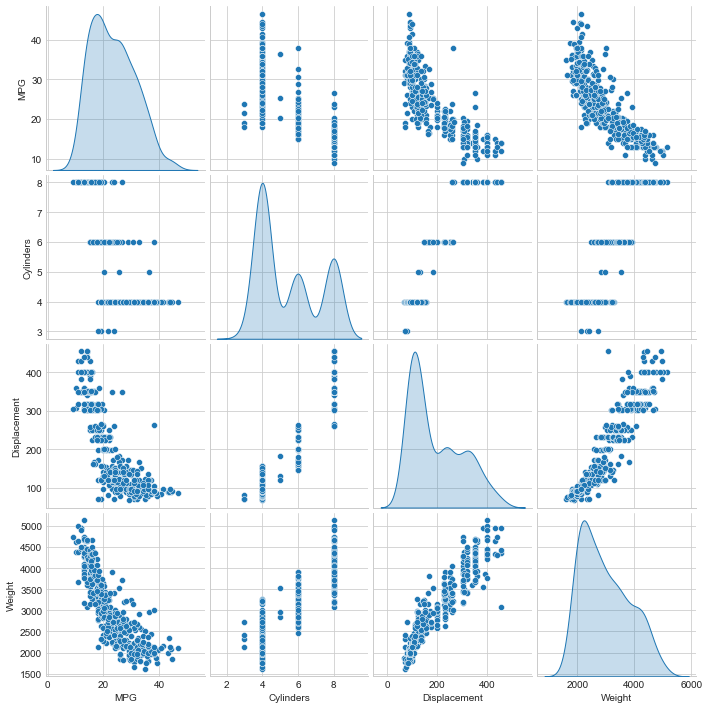

In [16]:
# plotting
sns.pairplot(df[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

In [17]:
# moving the target column to the end of the dataset
mpgs = df.pop("MPG")
df['MPG'] = mpgs

In [18]:
# checking changes
df.head(3)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
0,8,307.0,130.0,3504.0,12.0,70,0,0,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,0,0,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,0,0,1,18.0


## Standardizing Features

In [19]:
# defining the features that need to be standardized
tostd = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
tostd

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year']

In [20]:
# applying scaling to features
scaler = StandardScaler()
df[tostd] = scaler.fit_transform(df[tostd])
df.head(2)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,0,0,1,18.0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,0,0,1,15.0


## Creating Train and Test Datasets

- Create list of features columns
- Create X and Y sets
- Create Training and Test datasets

In [21]:
# creating list of features cols
features = list(df.columns)
features.remove('MPG')
features

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year',
 'Europe',
 'Japan',
 'USA']

In [22]:
# creating X set
X = df[features].values

In [23]:
# creating Y set
y = df['MPG'].values

In [24]:
# creating Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 2345)

# Creating a Neural Network


- Build a sequential model with 2 densely connected hidden layers
- Add an output layer that has a single continous value
- Define the optimizer with a learning rate
- Compile the model with loss function as MSE and use metrics MAE and MSE  

Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems). Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE). If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.

In [25]:
# instantiating the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [26]:
# creating optimizer
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [27]:
# compiling model
model.compile(loss='mse', optimizer=optimizer,
              metrics=['mae', 'mse'])

In [28]:
# getting summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


# Trainning the Neural Network

In [29]:
# trainning the model and including a validation set (composed of 10% of the dataset)
# capturing the returned history enables to plot the change in error/loss and accuracy over time
EPOCHS = 1000
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs = EPOCHS, verbose = 1)

Train on 250 samples, validate on 63 samples
Epoch 1/1000
250/250 [==============================] - 1s 2ms/sample - loss: 574.0743 - mae: 22.6743 - mse: 574.0743 - val_loss: 549.5606 - val_mae: 22.1326 - val_mse: 549.5606
Epoch 2/1000
250/250 [==============================] - 0s 77us/sample - loss: 493.5800 - mae: 20.8884 - mse: 493.5800 - val_loss: 468.9873 - val_mae: 20.2886 - val_mse: 468.9873
Epoch 3/1000
250/250 [==============================] - 0s 83us/sample - loss: 407.9411 - mae: 18.8123 - mse: 407.9412 - val_loss: 380.9861 - val_mae: 18.0779 - val_mse: 380.9861
Epoch 4/1000
250/250 [==============================] - 0s 74us/sample - loss: 316.7536 - mae: 16.3632 - mse: 316.7536 - val_loss: 290.6650 - val_mae: 15.5417 - val_mse: 290.6649
Epoch 5/1000
250/250 [==============================] - 0s 94us/sample - loss: 227.5761 - mae: 13.6096 - mse: 227.5761 - val_loss: 205.2347 - val_mae: 12.8941 - val_mse: 205.2347
Epoch 6/1000
250/250 [==============================] - 0s 76

250/250 [==============================] - 0s 66us/sample - loss: 5.7604 - mae: 1.6800 - mse: 5.7604 - val_loss: 9.8740 - val_mae: 2.1554 - val_mse: 9.8740
Epoch 97/1000
250/250 [==============================] - 0s 64us/sample - loss: 5.4425 - mae: 1.6566 - mse: 5.4425 - val_loss: 9.0924 - val_mae: 2.2275 - val_mse: 9.0924
Epoch 98/1000
250/250 [==============================] - 0s 64us/sample - loss: 5.5762 - mae: 1.6969 - mse: 5.5762 - val_loss: 9.2382 - val_mae: 2.3280 - val_mse: 9.2382
Epoch 99/1000
250/250 [==============================] - 0s 66us/sample - loss: 5.5129 - mae: 1.6663 - mse: 5.5129 - val_loss: 9.9586 - val_mae: 2.1625 - val_mse: 9.9586
Epoch 100/1000
250/250 [==============================] - 0s 64us/sample - loss: 5.5984 - mae: 1.6997 - mse: 5.5984 - val_loss: 9.4555 - val_mae: 2.2531 - val_mse: 9.4555
Epoch 101/1000
250/250 [==============================] - 0s 66us/sample - loss: 5.3942 - mae: 1.6821 - mse: 5.3942 - val_loss: 9.2658 - val_mae: 2.2874 - val_mse:

Epoch 144/1000
250/250 [==============================] - 0s 69us/sample - loss: 4.9593 - mae: 1.5810 - mse: 4.9593 - val_loss: 10.1998 - val_mae: 2.1591 - val_mse: 10.1998
Epoch 145/1000
250/250 [==============================] - 0s 69us/sample - loss: 5.0522 - mae: 1.5874 - mse: 5.0522 - val_loss: 9.4699 - val_mae: 2.1245 - val_mse: 9.4699
Epoch 146/1000
250/250 [==============================] - 0s 69us/sample - loss: 4.7035 - mae: 1.5284 - mse: 4.7035 - val_loss: 9.4431 - val_mae: 2.3702 - val_mse: 9.4431
Epoch 147/1000
250/250 [==============================] - 0s 69us/sample - loss: 4.7887 - mae: 1.5682 - mse: 4.7888 - val_loss: 9.2168 - val_mae: 2.1672 - val_mse: 9.2168
Epoch 148/1000
250/250 [==============================] - 0s 64us/sample - loss: 4.8430 - mae: 1.5408 - mse: 4.8430 - val_loss: 9.8015 - val_mae: 2.1346 - val_mse: 9.8015
Epoch 149/1000
250/250 [==============================] - 0s 72us/sample - loss: 4.7314 - mae: 1.5334 - mse: 4.7314 - val_loss: 9.8749 - val_ma

Epoch 192/1000
250/250 [==============================] - 0s 62us/sample - loss: 4.7444 - mae: 1.5139 - mse: 4.7444 - val_loss: 9.4634 - val_mae: 2.2819 - val_mse: 9.4634
Epoch 193/1000
250/250 [==============================] - 0s 68us/sample - loss: 4.4727 - mae: 1.4623 - mse: 4.4727 - val_loss: 9.4794 - val_mae: 2.2051 - val_mse: 9.4794
Epoch 194/1000
250/250 [==============================] - 0s 67us/sample - loss: 4.2557 - mae: 1.4192 - mse: 4.2557 - val_loss: 10.2415 - val_mae: 2.1500 - val_mse: 10.2415
Epoch 195/1000
250/250 [==============================] - 0s 75us/sample - loss: 4.3866 - mae: 1.4832 - mse: 4.3866 - val_loss: 9.4877 - val_mae: 2.1147 - val_mse: 9.4877
Epoch 196/1000
250/250 [==============================] - 0s 65us/sample - loss: 4.5858 - mae: 1.5148 - mse: 4.5858 - val_loss: 9.4993 - val_mae: 2.1510 - val_mse: 9.4993
Epoch 197/1000
250/250 [==============================] - 0s 67us/sample - loss: 4.5852 - mae: 1.4602 - mse: 4.5852 - val_loss: 9.9867 - val_ma

Epoch 240/1000
250/250 [==============================] - 0s 61us/sample - loss: 4.1731 - mae: 1.3581 - mse: 4.1731 - val_loss: 9.5737 - val_mae: 2.1588 - val_mse: 9.5737
Epoch 241/1000
250/250 [==============================] - 0s 62us/sample - loss: 4.2361 - mae: 1.4315 - mse: 4.2361 - val_loss: 9.9169 - val_mae: 2.2747 - val_mse: 9.9169
Epoch 242/1000
250/250 [==============================] - 0s 63us/sample - loss: 4.0313 - mae: 1.3926 - mse: 4.0313 - val_loss: 9.8196 - val_mae: 2.1558 - val_mse: 9.8196
Epoch 243/1000
250/250 [==============================] - 0s 64us/sample - loss: 4.1087 - mae: 1.3575 - mse: 4.1087 - val_loss: 9.6148 - val_mae: 2.2178 - val_mse: 9.6148
Epoch 244/1000
250/250 [==============================] - 0s 66us/sample - loss: 4.1165 - mae: 1.3843 - mse: 4.1165 - val_loss: 9.6543 - val_mae: 2.3092 - val_mse: 9.6543
Epoch 245/1000
250/250 [==============================] - 0s 63us/sample - loss: 4.2817 - mae: 1.4125 - mse: 4.2817 - val_loss: 9.5588 - val_mae:

Epoch 288/1000
250/250 [==============================] - 0s 70us/sample - loss: 3.8474 - mae: 1.3640 - mse: 3.8474 - val_loss: 9.9946 - val_mae: 2.1593 - val_mse: 9.9946
Epoch 289/1000
250/250 [==============================] - 0s 75us/sample - loss: 3.6487 - mae: 1.3070 - mse: 3.6487 - val_loss: 10.4787 - val_mae: 2.1765 - val_mse: 10.4787
Epoch 290/1000
250/250 [==============================] - 0s 72us/sample - loss: 3.9635 - mae: 1.3320 - mse: 3.9635 - val_loss: 10.0610 - val_mae: 2.1858 - val_mse: 10.0610
Epoch 291/1000
250/250 [==============================] - 0s 81us/sample - loss: 3.5762 - mae: 1.2941 - mse: 3.5762 - val_loss: 9.5498 - val_mae: 2.2307 - val_mse: 9.5498
Epoch 292/1000
250/250 [==============================] - 0s 81us/sample - loss: 3.7300 - mae: 1.2973 - mse: 3.7300 - val_loss: 10.2140 - val_mae: 2.1469 - val_mse: 10.2140
Epoch 293/1000
250/250 [==============================] - 0s 80us/sample - loss: 3.7918 - mae: 1.3439 - mse: 3.7918 - val_loss: 9.6460 - va

250/250 [==============================] - 0s 72us/sample - loss: 3.2178 - mae: 1.1747 - mse: 3.2178 - val_loss: 10.4439 - val_mae: 2.2855 - val_mse: 10.4439
Epoch 383/1000
250/250 [==============================] - 0s 66us/sample - loss: 3.3678 - mae: 1.2204 - mse: 3.3678 - val_loss: 10.3300 - val_mae: 2.2206 - val_mse: 10.3300
Epoch 384/1000
250/250 [==============================] - 0s 72us/sample - loss: 3.2540 - mae: 1.2134 - mse: 3.2540 - val_loss: 10.2826 - val_mae: 2.2195 - val_mse: 10.2826
Epoch 385/1000
250/250 [==============================] - 0s 65us/sample - loss: 3.4012 - mae: 1.2375 - mse: 3.4012 - val_loss: 10.7021 - val_mae: 2.2180 - val_mse: 10.7021
Epoch 386/1000
250/250 [==============================] - 0s 69us/sample - loss: 3.5746 - mae: 1.2904 - mse: 3.5746 - val_loss: 11.7353 - val_mae: 2.2845 - val_mse: 11.7353
Epoch 387/1000
250/250 [==============================] - 0s 68us/sample - loss: 3.2150 - mae: 1.2147 - mse: 3.2150 - val_loss: 10.6041 - val_mae: 2.1

250/250 [==============================] - 0s 68us/sample - loss: 3.2124 - mae: 1.1826 - mse: 3.2124 - val_loss: 11.1194 - val_mae: 2.3001 - val_mse: 11.1194
Epoch 477/1000
250/250 [==============================] - 0s 68us/sample - loss: 2.7334 - mae: 1.0742 - mse: 2.7334 - val_loss: 10.4673 - val_mae: 2.2105 - val_mse: 10.4673
Epoch 478/1000
250/250 [==============================] - 0s 69us/sample - loss: 2.7629 - mae: 1.1117 - mse: 2.7629 - val_loss: 10.8736 - val_mae: 2.2232 - val_mse: 10.8736
Epoch 479/1000
250/250 [==============================] - 0s 69us/sample - loss: 2.7641 - mae: 1.1111 - mse: 2.7641 - val_loss: 10.9306 - val_mae: 2.2796 - val_mse: 10.9306
Epoch 480/1000
250/250 [==============================] - 0s 71us/sample - loss: 3.2992 - mae: 1.2221 - mse: 3.2992 - val_loss: 11.0023 - val_mae: 2.3966 - val_mse: 11.0023
Epoch 481/1000
250/250 [==============================] - 0s 74us/sample - loss: 2.8393 - mae: 1.1028 - mse: 2.8393 - val_loss: 10.7555 - val_mae: 2.2

250/250 [==============================] - 0s 73us/sample - loss: 2.8143 - mae: 1.1212 - mse: 2.8143 - val_loss: 11.0696 - val_mae: 2.2202 - val_mse: 11.0696
Epoch 571/1000
250/250 [==============================] - 0s 73us/sample - loss: 2.5879 - mae: 1.0535 - mse: 2.5879 - val_loss: 11.1126 - val_mae: 2.1943 - val_mse: 11.1126
Epoch 572/1000
250/250 [==============================] - 0s 72us/sample - loss: 2.3695 - mae: 1.0121 - mse: 2.3695 - val_loss: 10.9638 - val_mae: 2.2314 - val_mse: 10.9638
Epoch 573/1000
250/250 [==============================] - 0s 73us/sample - loss: 2.5456 - mae: 1.0638 - mse: 2.5456 - val_loss: 12.7889 - val_mae: 2.3502 - val_mse: 12.7889
Epoch 574/1000
250/250 [==============================] - 0s 72us/sample - loss: 2.4751 - mae: 1.0337 - mse: 2.4751 - val_loss: 10.7282 - val_mae: 2.2596 - val_mse: 10.7282
Epoch 575/1000
250/250 [==============================] - 0s 73us/sample - loss: 2.4704 - mae: 1.0103 - mse: 2.4704 - val_loss: 11.5342 - val_mae: 2.1

250/250 [==============================] - 0s 72us/sample - loss: 2.5418 - mae: 1.0472 - mse: 2.5418 - val_loss: 11.3397 - val_mae: 2.2489 - val_mse: 11.3397
Epoch 665/1000
250/250 [==============================] - 0s 68us/sample - loss: 2.0555 - mae: 0.9281 - mse: 2.0555 - val_loss: 11.8510 - val_mae: 2.2309 - val_mse: 11.8510
Epoch 666/1000
250/250 [==============================] - 0s 76us/sample - loss: 2.3317 - mae: 0.9571 - mse: 2.3317 - val_loss: 12.0523 - val_mae: 2.2448 - val_mse: 12.0523
Epoch 667/1000
250/250 [==============================] - 0s 74us/sample - loss: 2.2476 - mae: 0.9832 - mse: 2.2476 - val_loss: 12.1903 - val_mae: 2.2665 - val_mse: 12.1903
Epoch 668/1000
250/250 [==============================] - 0s 72us/sample - loss: 2.4443 - mae: 0.9921 - mse: 2.4443 - val_loss: 12.6936 - val_mae: 2.3132 - val_mse: 12.6936
Epoch 669/1000
250/250 [==============================] - 0s 67us/sample - loss: 2.2335 - mae: 0.9767 - mse: 2.2335 - val_loss: 11.0401 - val_mae: 2.2

250/250 [==============================] - 0s 64us/sample - loss: 1.9408 - mae: 0.8884 - mse: 1.9408 - val_loss: 11.7881 - val_mae: 2.2876 - val_mse: 11.7881
Epoch 759/1000
250/250 [==============================] - 0s 69us/sample - loss: 2.2582 - mae: 0.9876 - mse: 2.2582 - val_loss: 11.1904 - val_mae: 2.3066 - val_mse: 11.1904
Epoch 760/1000
250/250 [==============================] - 0s 69us/sample - loss: 2.0062 - mae: 0.9013 - mse: 2.0062 - val_loss: 11.7887 - val_mae: 2.3114 - val_mse: 11.7887
Epoch 761/1000
250/250 [==============================] - 0s 69us/sample - loss: 2.2425 - mae: 0.9758 - mse: 2.2425 - val_loss: 11.4330 - val_mae: 2.3318 - val_mse: 11.4330
Epoch 762/1000
250/250 [==============================] - 0s 67us/sample - loss: 1.9475 - mae: 0.8973 - mse: 1.9475 - val_loss: 11.9458 - val_mae: 2.2644 - val_mse: 11.9458
Epoch 763/1000
250/250 [==============================] - 0s 69us/sample - loss: 2.0438 - mae: 0.9469 - mse: 2.0438 - val_loss: 12.2527 - val_mae: 2.4

250/250 [==============================] - 0s 80us/sample - loss: 1.9355 - mae: 0.9046 - mse: 1.9355 - val_loss: 12.9105 - val_mae: 2.4905 - val_mse: 12.9105
Epoch 853/1000
250/250 [==============================] - 0s 72us/sample - loss: 2.0626 - mae: 0.9244 - mse: 2.0626 - val_loss: 12.7425 - val_mae: 2.3325 - val_mse: 12.7425
Epoch 854/1000
250/250 [==============================] - 0s 72us/sample - loss: 1.8142 - mae: 0.8363 - mse: 1.8142 - val_loss: 12.0958 - val_mae: 2.2798 - val_mse: 12.0958
Epoch 855/1000
250/250 [==============================] - 0s 74us/sample - loss: 2.1058 - mae: 0.9190 - mse: 2.1058 - val_loss: 12.1270 - val_mae: 2.4062 - val_mse: 12.1270
Epoch 856/1000
250/250 [==============================] - 0s 74us/sample - loss: 1.8864 - mae: 0.8791 - mse: 1.8864 - val_loss: 12.7855 - val_mae: 2.3316 - val_mse: 12.7855
Epoch 857/1000
250/250 [==============================] - 0s 72us/sample - loss: 1.7992 - mae: 0.8188 - mse: 1.7992 - val_loss: 11.6232 - val_mae: 2.2

250/250 [==============================] - 0s 69us/sample - loss: 1.7255 - mae: 0.8287 - mse: 1.7255 - val_loss: 12.3820 - val_mae: 2.4364 - val_mse: 12.3820
Epoch 947/1000
250/250 [==============================] - 0s 67us/sample - loss: 1.8761 - mae: 0.9226 - mse: 1.8761 - val_loss: 12.0708 - val_mae: 2.2938 - val_mse: 12.0708
Epoch 948/1000
250/250 [==============================] - 0s 65us/sample - loss: 1.9072 - mae: 0.8870 - mse: 1.9072 - val_loss: 12.1906 - val_mae: 2.2625 - val_mse: 12.1906
Epoch 949/1000
250/250 [==============================] - 0s 67us/sample - loss: 1.7684 - mae: 0.8079 - mse: 1.7684 - val_loss: 12.4575 - val_mae: 2.3650 - val_mse: 12.4575
Epoch 950/1000
250/250 [==============================] - 0s 72us/sample - loss: 1.9326 - mae: 0.9033 - mse: 1.9326 - val_loss: 11.9091 - val_mae: 2.2649 - val_mse: 11.9091
Epoch 951/1000
250/250 [==============================] - 0s 80us/sample - loss: 1.7992 - mae: 0.8972 - mse: 1.7992 - val_loss: 12.3814 - val_mae: 2.2

## Model Performance on Training Dataset

In [30]:
# getting model metrics
metrics_names = model.metrics_names
metrics_names

['loss', 'mae', 'mse']

In [31]:
# creating new df
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [32]:
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,574.074283,22.674284,574.074341,549.560568,22.132635,549.560608,0
1,493.580033,20.888361,493.580017,468.987309,20.288597,468.987335,1
2,407.941137,18.812325,407.941162,380.986082,18.077930,380.986084,2
3,316.753625,16.363184,316.753632,290.664960,15.541729,290.664948,3
4,227.576087,13.609601,227.576080,205.234710,12.894144,205.234711,4


In [33]:
# creating a function for plotting
def plot_graphs(history, string, ylim = [1, 10]):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Training and validation')
    plt.ylim = ylim
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

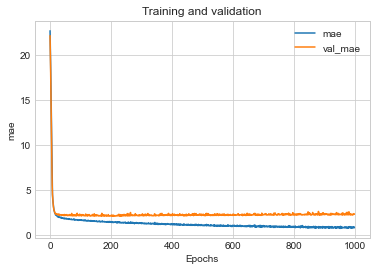

In [34]:
# plotting mae
plot_graphs(history, 'mae')

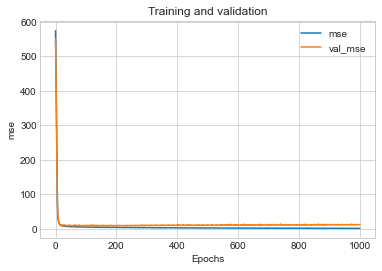

In [35]:
# plotting mse
plot_graphs(history, 'mse', ylim = [1, 20])

In [36]:
# evaluating the model wiht thetest dataset
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Squared Error: {:5.2f} MPG".format(mse))

79/79 - 0s - loss: 8.1028 - mae: 2.2250 - mse: 8.1028
Testing set Mean Abs Error:  2.22 MPG
Testing set Mean Squared Error:  8.10 MPG


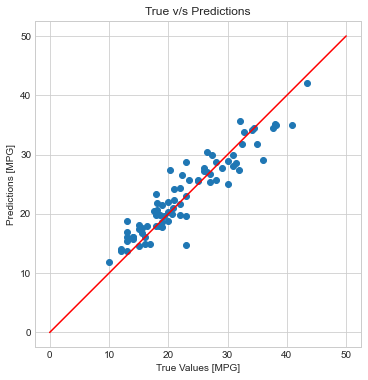

In [37]:
# plotting 
test_predictions = model.predict(X_test).flatten()
plt.figure(figsize = (6,6))
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.plot([0,50], [0, 50], 'r')
plt.title("True v/s Predictions")
plt.show()

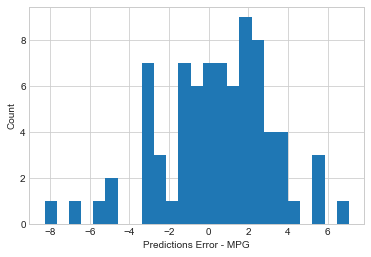

In [38]:
# plotting prediction error
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Predictions Error - MPG")
plt.ylabel("Count")
plt.show()

Not a gaussian curve, larger data set might give a better curve.